In [62]:
import pandas as pd
import numpy as np
import sys
import os
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from simpledbf import Dbf5
import geopandas as gpd

ITERATION = 1
MODEL_FOLDER = r'E:\Met_Council\metc-asim-model\Base_2022\highway'

TAZ_SHAPE = r'E:\Met_Council\metc-asim-model\Input_2022\Visualizer\SHP\TAZ2010.shp'

LAND_USE_INPUT = r'E:\Met_Council\metc-asim-model\Input_2022\socioeconomic'

land_use = pd.read_csv(os.path.join(LAND_USE_INPUT, 'land_use.csv'))

vmt_county = pd.read_csv(r'E:\Met_Council\metc-asim-model\Input_2022\validation\vmt_by_county.csv').set_index('County')

taz_shape = gpd.read_file(TAZ_SHAPE)
county_shape = taz_shape.dissolve('CO_NAME')

dy_net = gpd.read_file(os.path.join(MODEL_FOLDER, f"HWY_LDNET_{ITERATION}_DY.shp")).rename(columns = {'VOL_TOT_DAI': 'Model'}).set_crs('epsg:3722').sjoin(county_shape)
dy_net['linkcode'] = dy_net['A'].astype(str) + "-" + dy_net['B'].astype(str)

counts = pd.read_csv("LinkCounts.csv")
counts = counts[counts['MainlineLink'].str.len() > 1]
counts = counts.merge(dy_net[['linkcode', 'Model', 'DISTANCE']].rename(columns = {'Model': 'Model_mainline'}), how = 'left', left_on = 'MainlineLink', right_on = 'linkcode')
counts = counts.merge(dy_net[['linkcode', 'Model']].rename(columns = {'Model': 'Model_HOT'}), how = 'left', left_on = 'HOTLink', right_on = 'linkcode')
counts['TOT_COUNT'] = counts['HOT_Daily'].fillna(0) + counts['Mainline_Daily'].fillna(0)
counts['TOT_MODEL'] = counts['Model_mainline'].fillna(0) + counts['Model_HOT'].fillna(0)
counts['COUNT_VMT'] = counts['TOT_COUNT'] * counts['DISTANCE']
counts['MODEL_VMT'] = counts['TOT_MODEL'] * counts['DISTANCE']
#dy_net = Dbf5(os.path.join(MODEL_FOLDER, f"HWY_LDNET_{ITERATION}_DAILY.dbf")).to_dataframe().rename(columns = {'COUNT': 'Count', 'VOL_TOT_DAI': 'Model'})

# dy_net['Count_VMT'] = dy_net['Count'] * dy_net['DISTANCE']
dy_net['Model_VMT'] = dy_net['Model'] * dy_net['DISTANCE']



c:\Users\andrew.rohne\.conda\envs\asim_asr_dev\lib\site-packages\geopandas\geodataframe.py:2177: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3722
Right CRS: EPSG:26915

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [63]:
counts

,NODE_LON,NODE_LAT,NODE_NAME,HOTLink,MainlineLink,Mananged Volumes,HOT_Daily,Mainline_Daily,HOT_AM,Mainline_AM,...,Mainline_NT,linkcode_x,Model_mainline,DISTANCE,linkcode_y,Model_HOT,TOT_COUNT,TOT_MODEL,COUNT_VMT,MODEL_VMT
0,-93.18597,44.89012,rnd_95327,NaN,198335-198325,0.0,NaN,NaN,NaN,NaN,...,NaN,198335-198325,31974.73828,0.39199,NaN,NaN,0.0,31974.73828,0.000000,12533.777658
1,-93.18589,45.06660,rnd_87483,718330-765134,218330-265134,1.0,NaN,NaN,NaN,NaN,...,NaN,218330-265134,58777.44922,0.24008,718330-765134,0.0,0.0,58777.44922,0.000000,14111.290009
2,-93.18570,45.07744,rnd_87823,621510-621511,121510-121511,1.0,NaN,NaN,NaN,NaN,...,NaN,121510-121511,45645.77734,0.42755,621510-621511,0.0,0.0,45645.77734,0.000000,19515.852102
3,-93.18555,45.07251,rnd_87827,626024-718325,126024-218325,1.0,NaN,NaN,NaN,NaN,...,NaN,126024-218325,54430.16406,0.21927,626024-718325,0.0,0.0,54430.16406,0.000000,11934.902073
4,-93.18552,45.06990,rnd_87487,NaN,218329-218328,0.0,NaN,NaN,NaN,NaN,...,NaN,218329-218328,5925.25244,0.41056,NaN,NaN,0.0,5925.25244,0.000000,2432.671642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,NaN,NaN,74997,NaN,261304-165742,NaN,NaN,255.0,NaN,NaN,...,NaN,261304-165742,0.00000,0.03423,NaN,NaN,255.0,0.00000,8.728650,0.000000
4472,NaN,NaN,75313,NaN,44609-58541,NaN,NaN,170.5,NaN,NaN,...,NaN,44609-58541,276.26672,0.19851,NaN,NaN,170.5,276.26672,33.845955,54.841707
4473,NaN,NaN,75313,NaN,58541-44609,NaN,NaN,170.5,NaN,NaN,...,NaN,58541-44609,318.32657,0.19851,NaN,NaN,170.5,318.32657,33.845955,63.191007
4474,NaN,NaN,76031,NaN,111264-110136,NaN,NaN,89.5,NaN,NaN,...,NaN,111264-110136,13.34000,0.46774,NaN,NaN,89.5,13.34000,41.862730,6.239652


In [64]:
# DELETE ME NEXT RUN!
fun2 = np.poly1d([0, 1, 20000])
counts_drop = counts[(counts['TOT_COUNT'].fillna(0) > 30000) & (counts['TOT_MODEL'].fillna(0) < 0.5 * counts['TOT_COUNT'].fillna(0))]['MainlineLink']
counts = counts[~counts['MainlineLink'].isin(counts_drop)]

# counts_drop = counts[(counts['TOT_COUNT'].fillna(0) > 0) & (counts['TOT_MODEL'].fillna(0) > fun2(counts['TOT_COUNT'].fillna(0)))]['MainlineLink']
# counts = counts[~counts['MainlineLink'].isin(counts_drop)]

In [65]:
counts[(counts['TOT_COUNT'].fillna(0) > 0) & (counts['TOT_MODEL'].fillna(0) == 0)][['MainlineLink', 'TOT_COUNT', 'TOT_MODEL']].to_excel('no_assign.xlsx')

In [66]:
pd.DataFrame(counts[counts['TOT_COUNT'] > 0][['COUNT_VMT', 'MODEL_VMT']].sum()).style.format('{:,.0f}')

,0
COUNT_VMT,"10,972,990"
MODEL_VMT,"11,311,571"


In [67]:
vmt_diff = counts[counts['TOT_COUNT'] > 0]['MODEL_VMT'].sum() - counts[counts['TOT_COUNT'] > 0]['COUNT_VMT'].sum()
pct_diff = vmt_diff / counts[counts['TOT_COUNT'] > 0]['COUNT_VMT'].sum()
print(f"Difference: {vmt_diff:,.0f} ({pct_diff:.2%})")

Difference: 338,581 (3.09%)


In [68]:
cnt_diff = (counts[counts['TOT_COUNT'] > 0]['TOT_MODEL'] - counts[counts['TOT_COUNT'] > 0]['TOT_COUNT'])

cnt_pct_diff = cnt_diff / counts[counts['TOT_COUNT'] > 0]['TOT_COUNT']

print(f"Total count difference: {cnt_diff.sum():,.0f} ({cnt_diff.sum() / counts[counts['TOT_COUNT'] > 0]['TOT_COUNT'].sum():.2%})") 
print(f"Mean abs count difference: {cnt_diff.abs().sum():,.0f}")


Total count difference: 1,827,195 (8.95%)
Mean abs count difference: 5,519,320


In [69]:
x = counts[counts['TOT_COUNT'] > 0]
print(f"RMSE: {np.sqrt(((x.TOT_MODEL - x.TOT_COUNT)**2).sum() / x.shape[0]) / (x.TOT_COUNT.sum() / (x.TOT_COUNT.count()-1)):.2%}")

RMSE: 49.94%


Slope = 0.9299809560166189, intercept = -79.42262877829376


c:\Users\andrew.rohne\.conda\envs\asim_asr_dev\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


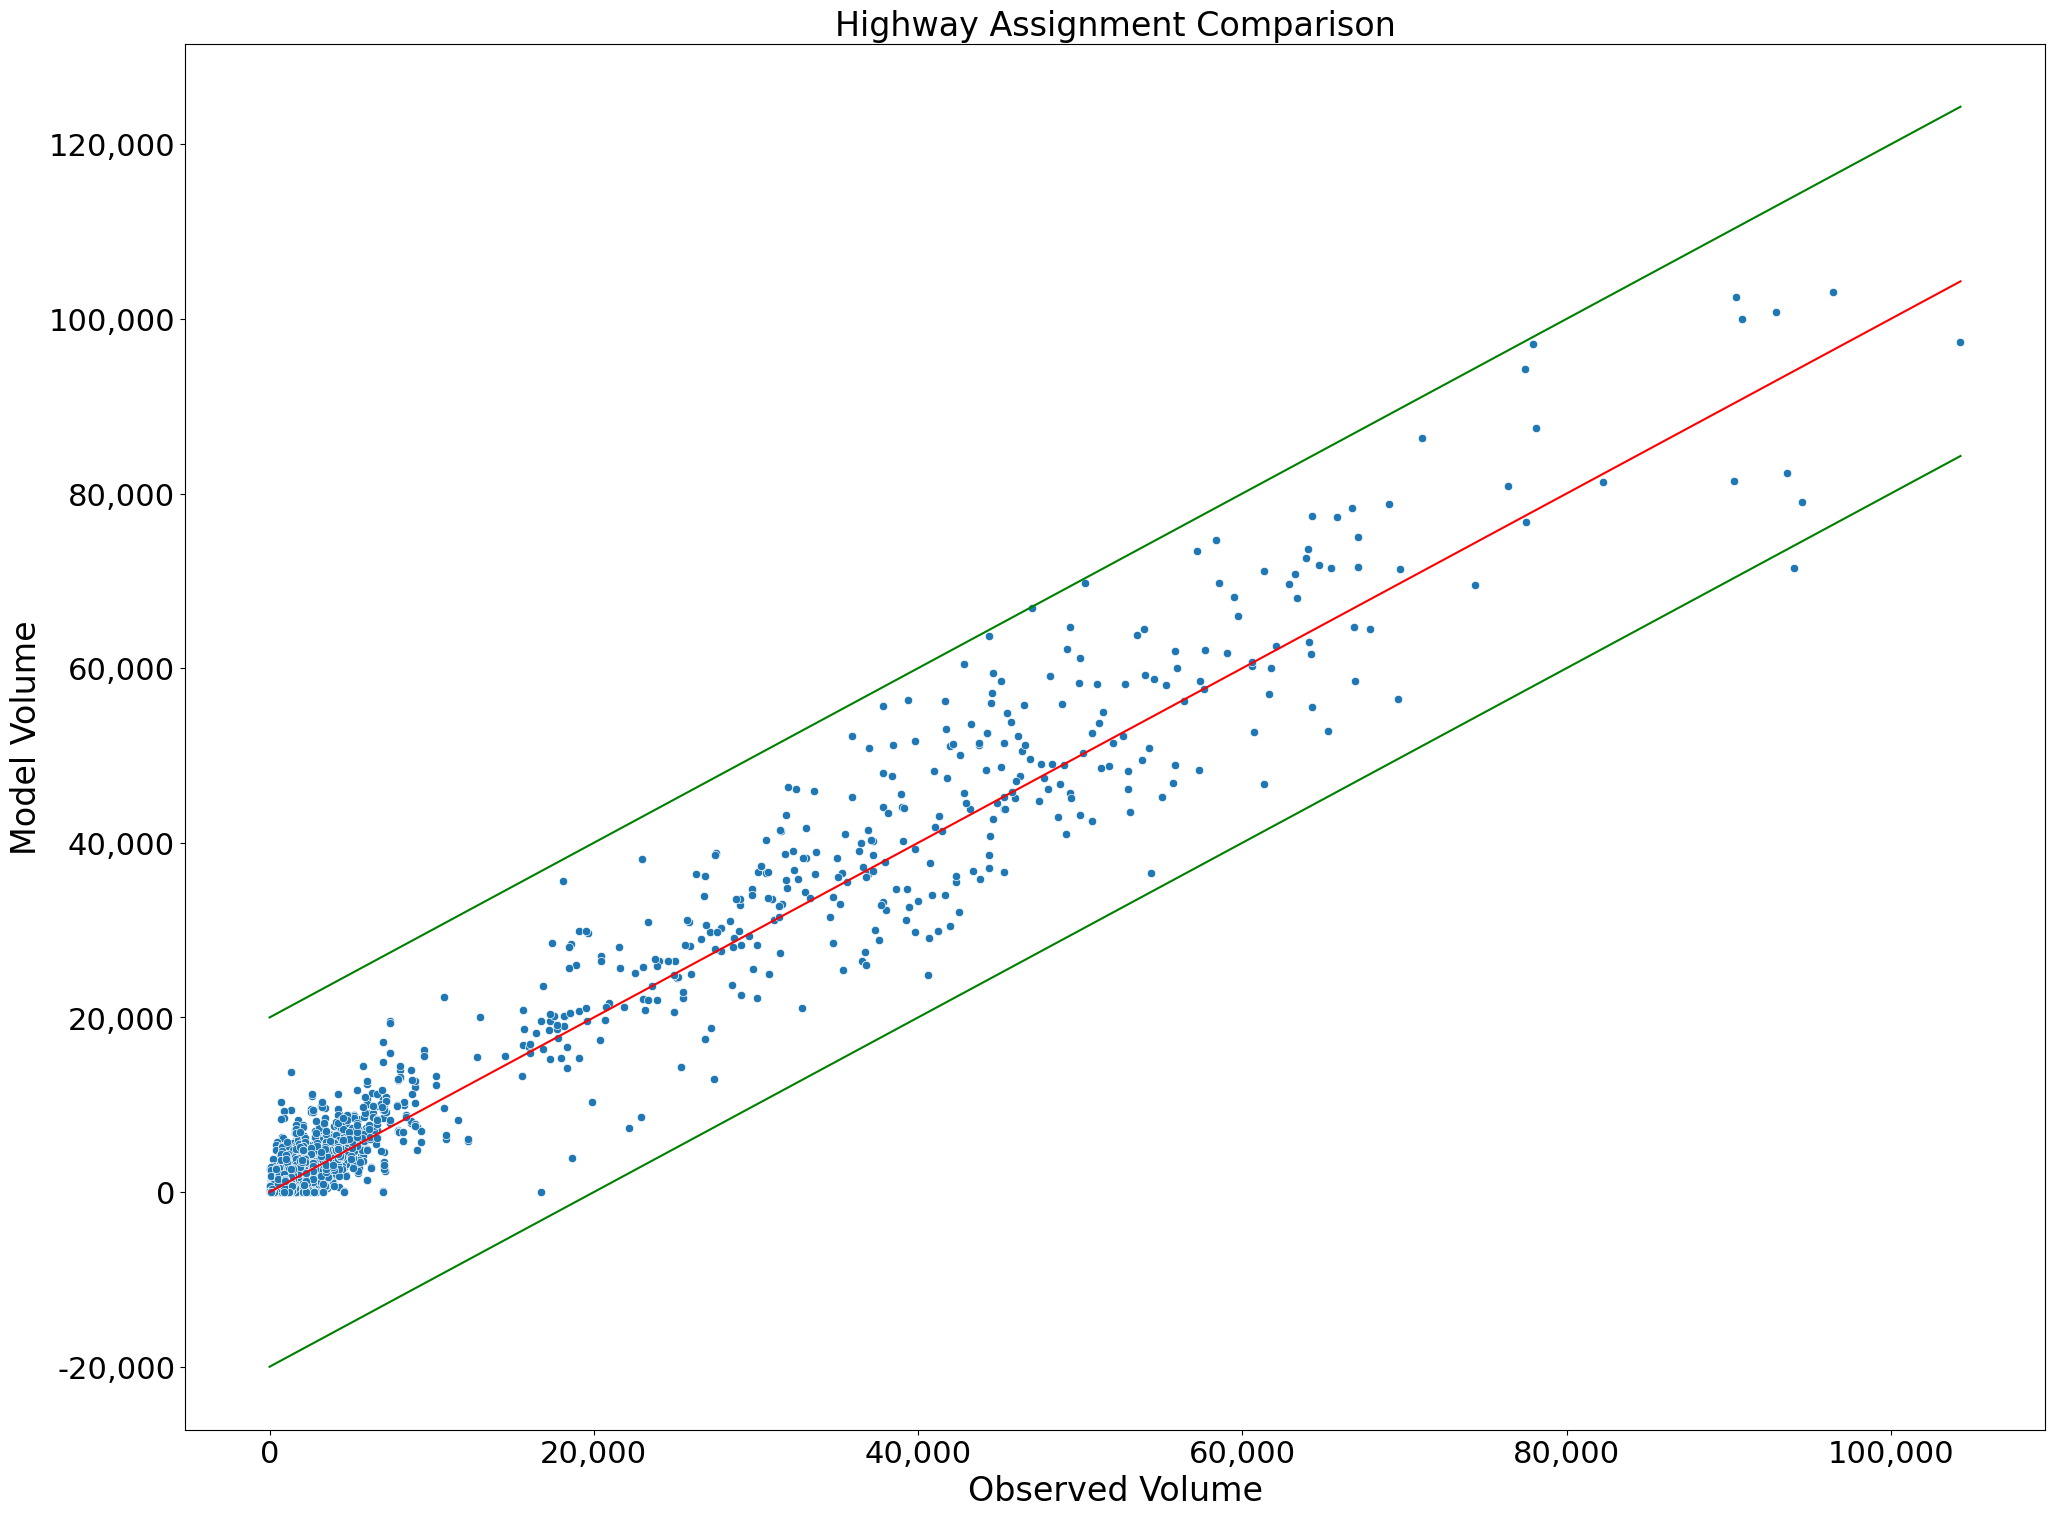

In [70]:
# counts[counts['TOT_COUNT'] > 0].plot(x = 'TOT_COUNT', y = 'TOT_MODEL', kind = 'scatter')
m,b = np.polyfit(counts[(counts['TOT_COUNT'].fillna(0) > 0)]['TOT_MODEL'], counts[counts['TOT_COUNT'].fillna(0) > 0]['TOT_COUNT'], 1)
poly1d_fn = np.poly1d(np.polyfit(counts[counts['TOT_COUNT'].fillna(0) > 0]['TOT_MODEL'], counts[counts['TOT_COUNT'].fillna(0) > 0]['TOT_COUNT'], 1)) 
print(f"Slope = {m}, intercept = {b}")

fun2 = np.poly1d([0, 1, 20000])
fun3 = np.poly1d([0, 1, -20000])

ftype_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'black', 5: 'black', 6: 'black'}

plot_data = counts[counts['TOT_COUNT'] > 0]
x_pred = np.linspace(0, np.max(np.max(plot_data[['TOT_MODEL', 'TOT_COUNT']])), 100)
yy_pred = np.linspace
fig, ax = plt.subplots(figsize=(24, 18))
plot_idx = 111
plt.subplot(plot_idx)
sns.lineplot(x=x_pred, y=x_pred, ax=ax, color = 'red')
sns.lineplot(x = x_pred, y = fun2(x_pred), color = 'green')
sns.lineplot(x = x_pred, y = fun3(x_pred), color = 'green')
# sns.lineplot(x = x_pred, y = poly1d_fn(x_pred), ax = ax, color = 'black', linestyle='dashed')
sns.scatterplot(data = plot_data, x = 'TOT_COUNT', y = 'TOT_MODEL') #, c = plot_data['FTYPE'].map(ftype_colors))
plt.title(f"Highway Assignment Comparison", fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('Model Volume', fontsize=24)
plt.xlabel('Observed Volume', fontsize=24)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

In [71]:
fun2(29898.581498)

49898.581498

In [72]:
counts[(counts['TOT_COUNT'].fillna(0) > 0) & (counts['TOT_MODEL'].fillna(0) > fun2(counts['TOT_COUNT'].fillna(0)))]

,NODE_LON,NODE_LAT,NODE_NAME,HOTLink,MainlineLink,Mananged Volumes,HOT_Daily,Mainline_Daily,HOT_AM,Mainline_AM,...,Mainline_NT,linkcode_x,Model_mainline,DISTANCE,linkcode_y,Model_HOT,TOT_COUNT,TOT_MODEL,COUNT_VMT,MODEL_VMT


In [73]:
# dy_net.merge(counts[counts['TOT_COUNT'] > 0][['HOTLink', 'MainlineLink', 'TOT_COUNT', 'TOT_MODEL']], how = 'left', left_on = 'linkcode', right_on = 'MainlineLink')

# dy_net['checkme'] = 0
# dy_net.loc[dy_net['linkcode'].isin(counts[(counts['TOT_COUNT'].fillna(0) > 30000) & (counts['TOT_MODEL'].fillna(0) < 0.5 * counts['TOT_COUNT'].fillna(0))]['MainlineLink']), 'checkme'] = 1

# dy_net.to_file(r'E:\Met_Council\metc-asim-model\Base_2022\highway\links_to_check.shp')


In [74]:
vmt_county

,Obs_VMT
County,
Anoka,8.399116e+06
Carver,2.410559e+06
Chisago,2.225375e+06
Dakota,1.083053e+07
Goodhue,1.899308e+06
Hennepin,2.958525e+07
Isanti,1.170623e+06
Le Sueur,7.864032e+05
McLeod,9.897169e+05


# Overall Network Summary

In [75]:
print(f"Total Model VMT: {dy_net['Model_VMT'].sum():,.0f}")

Total Model VMT: 108,629,032


In [76]:
dy_net[dy_net['Count'] > 0][['Count_VMT', 'Model_VMT']].sum().to_frame().style.format('{:,.0f}')

KeyError: 'Count'

In [ ]:
x = dy_net[dy_net['Count'] > 0]
print(f"{(x.Model-x.Count).mean():,.0f}")

-3,245


In [ ]:
x = dy_net[dy_net['Count'] > 0]
print(f"RMSE: {np.sqrt(((x.Model - x.Count)**2).sum() / x.shape[0]) / (x.Count.sum() / (x.Count.count()-1)):.2%}")

RMSE: 138.50%


In [ ]:
np.corrcoef(dy_net[(dy_net['Count'].fillna(0) > 0)]['Model'], dy_net[(dy_net['Count'].fillna(0) > 0)]['Count'])[0,1]**2

0.8349701288256303

In [ ]:
m,b = np.polyfit(dy_net[(dy_net['Count'].fillna(0) > 0)]['Model'], dy_net[dy_net['Count'].fillna(0) > 0]['Count'], 1)
poly1d_fn = np.poly1d(np.polyfit(dy_net[dy_net['Count'].fillna(0) > 0]['Model'], dy_net[dy_net['Count'].fillna(0) > 0]['Count'], 1)) 
print(f"Slope = {m}, intercept = {b}")

Slope = 1.67066940748301, intercept = 743.4868482734585


c:\Users\andrew.rohne\.conda\envs\asim_asr_dev\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


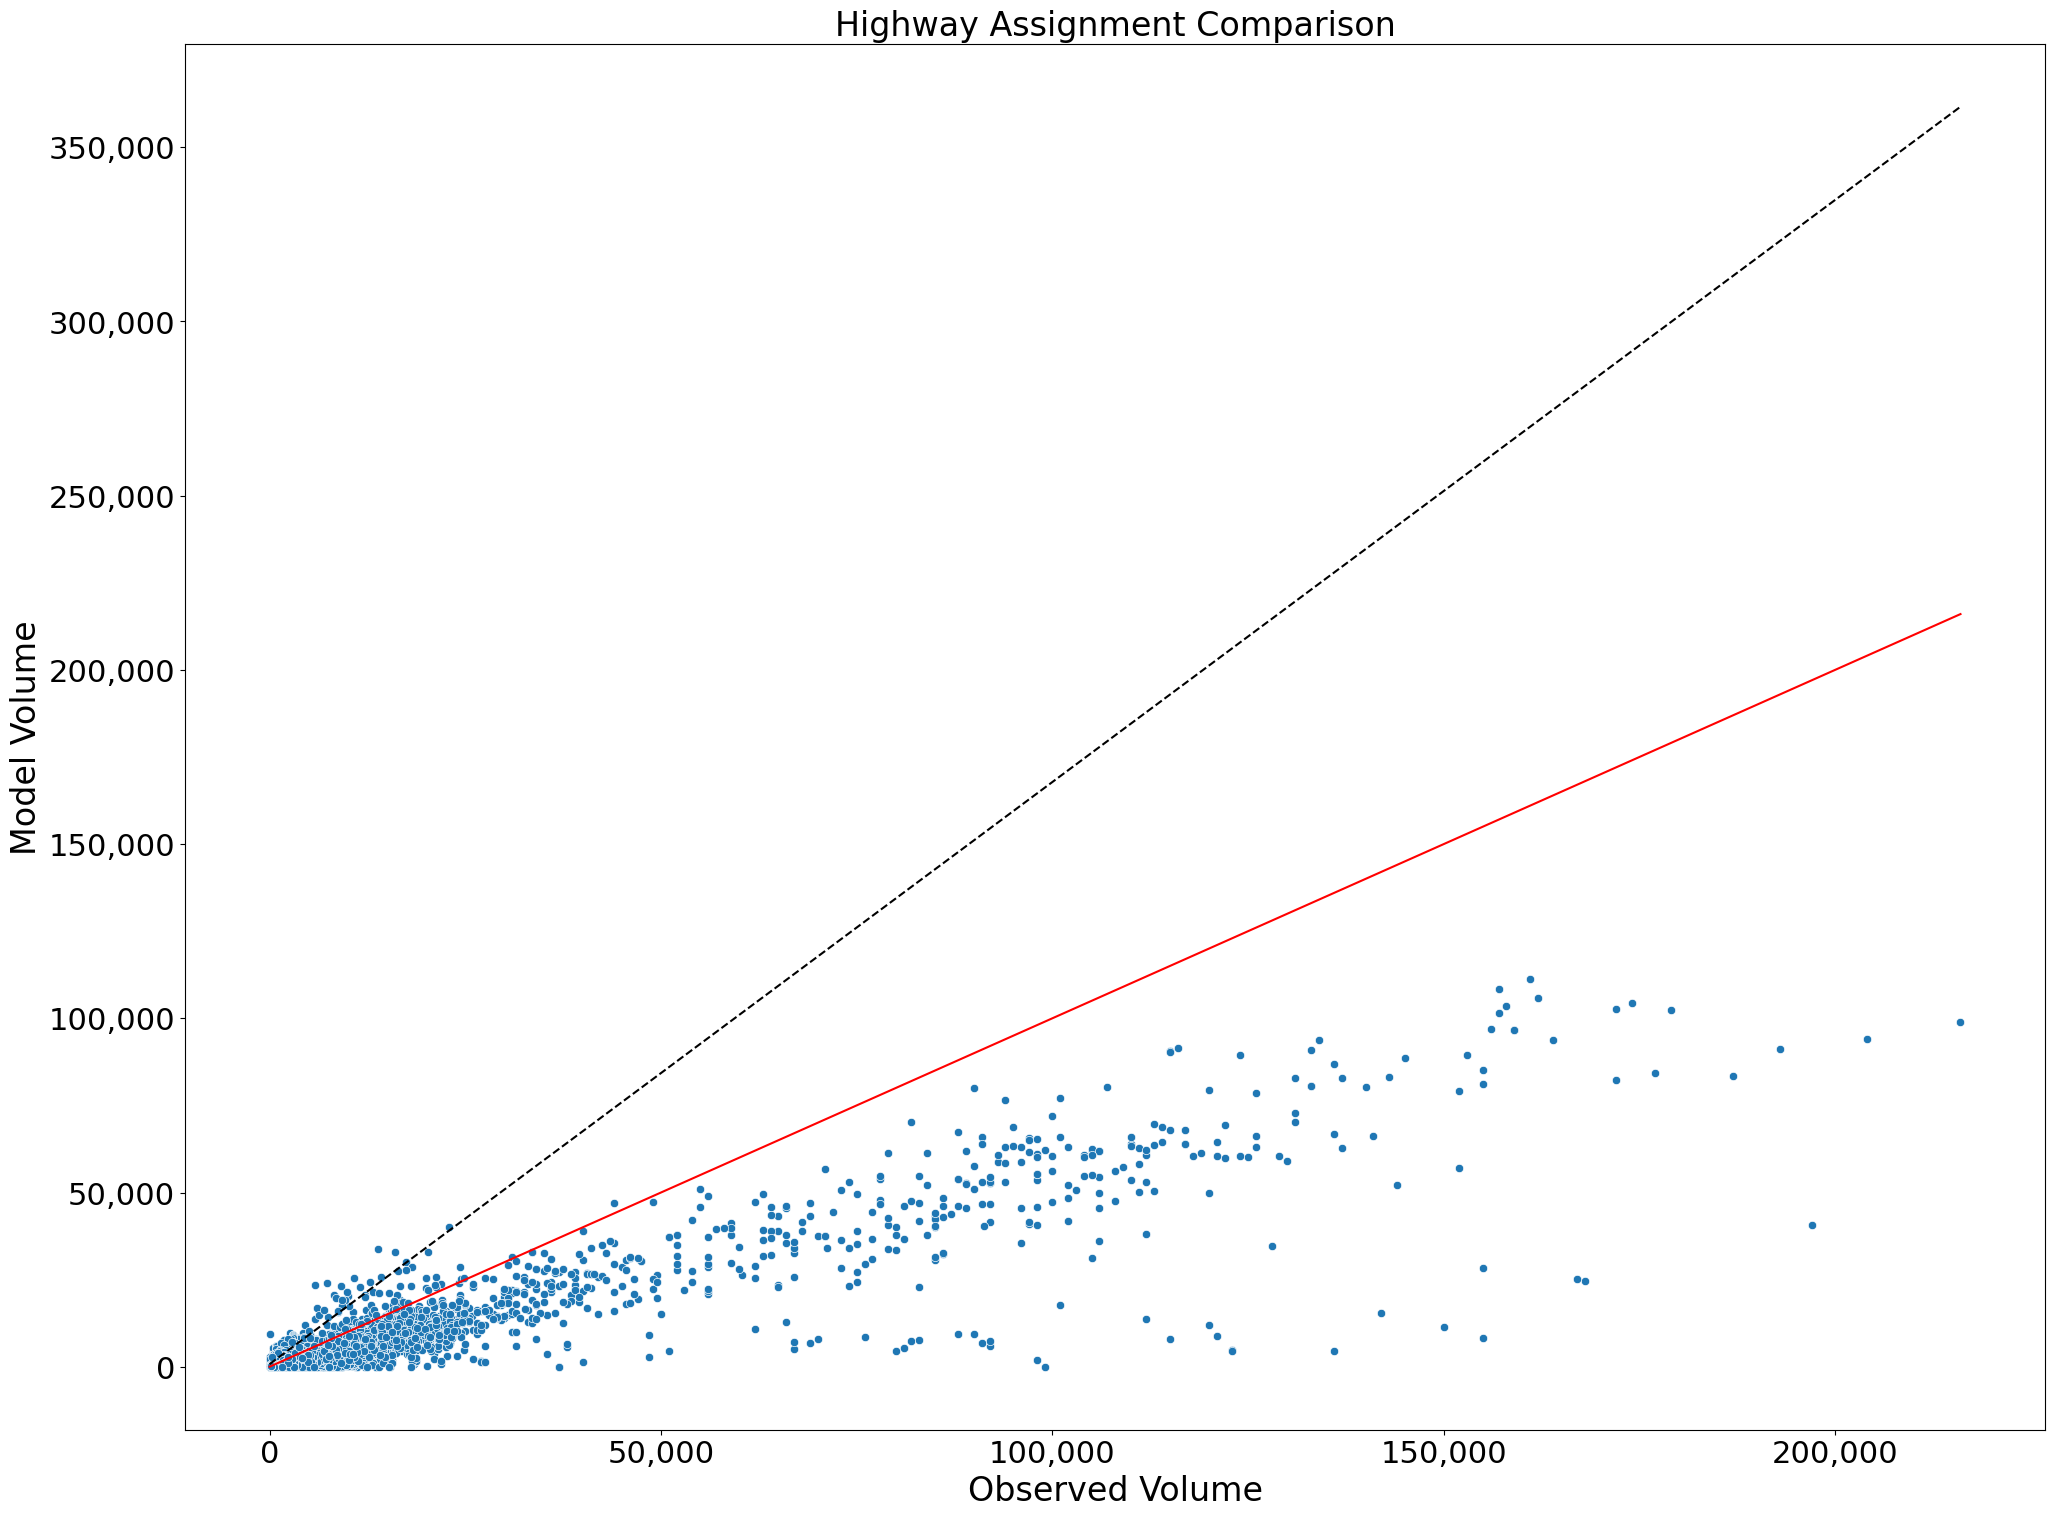

In [ ]:
ftype_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'black', 5: 'black', 6: 'black'}

plot_data = dy_net[(dy_net['Count'].fillna(0) > 0)]
x_pred = np.linspace(0, np.max(np.max(dy_net[['Model', 'Count']])), 100)
yy_pred = np.linspace
fig, ax = plt.subplots(figsize=(24, 18))
plot_idx = 111
plt.subplot(plot_idx)
sns.lineplot(x=x_pred, y=x_pred, ax=ax, color = 'red')
sns.lineplot(x = x_pred, y = poly1d_fn(x_pred), ax = ax, color = 'black', linestyle='dashed')
sns.scatterplot(data = plot_data, x = 'Count', y = 'Model') #, c = plot_data['FTYPE'].map(ftype_colors))
plt.title(f"Highway Assignment Comparison", fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('Model Volume', fontsize=24)
plt.xlabel('Observed Volume', fontsize=24)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# HPMS Comparison

In [ ]:
vmt_county['Obs_VMT'].sum()

96226065.131

In [ ]:
hpms_vmt = pd.concat([dy_net.rename(columns = {'index_right': 'County'}).groupby('County').agg(Model_VMT = ('Model_VMT', 'sum')).join(vmt_county),
    pd.DataFrame({'Model_VMT': dy_net['Model_VMT'].sum(), 'Obs_VMT': vmt_county['Obs_VMT'].sum()}, index = ['Total'])])

hpms_vmt['Difference'] = hpms_vmt['Model_VMT'] - hpms_vmt['Obs_VMT']
hpms_vmt['Pct Difference'] = hpms_vmt['Difference'] / hpms_vmt['Obs_VMT']

hpms_vmt.style.format({'Model_VMT': '{:,.0f}', 'Obs_VMT': '{:,.0f}', 'Difference': '{:,.0f}', 'Pct Difference': '{:.2%}'})

,Model_VMT,Obs_VMT,Difference,Pct Difference
Anoka,"8,996,840","8,399,116","597,724",7.12%
Carver,"3,066,571","2,410,559","656,012",27.21%
Chisago,"1,852,971","2,225,375","-372,404",-16.73%
Dakota,"12,121,246","10,830,531","1,290,714",11.92%
Goodhue,"1,977,868","1,899,308","78,561",4.14%
Hennepin,"36,591,468","29,585,245","7,006,223",23.68%
Isanti,"1,121,186","1,170,623","-49,437",-4.22%
Le Sueur,"862,580","786,403","76,176",9.69%
McLeod,"858,224","989,717","-131,493",-13.29%
Pierce,"959,100","1,067,675","-108,575",-10.17%
